## 1 Задание

### Построение графиков решений при разных $N_0$ и k

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

N_inf = 8900
k = 0.6
alpha = 1.6

def get_f(_k, _a):
    def f(N, t):
        return _k*N*(1-(N/N_inf)**_a)
    return f

n = 100
t_end = 10
t_eval = np.linspace(0, t_end, n+1)

#### Для стационарной точки 0

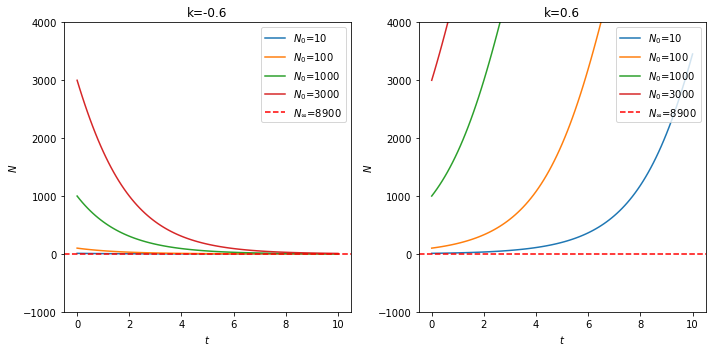

In [171]:
fig, ax = plt.subplots(1, 2, figsize = (5*2, 5), sharex=True, sharey=True)
for i, cur_k in enumerate([-0.6, 0.6]):
    rhs = get_f(cur_k, alpha)
    N_0 = np.array([10, 100, 1000, 3000])
    for _n in N_0:
        sol = odeint(rhs, [_n], t_eval)
        ax[i].plot(t_eval, sol, label='$N_0$={:.0f}'.format(_n))
    ax[i].axhline(y = 0, color = 'r', linestyle = '--', label = '$N_\infty$={:.0f}'.format(N_inf))
    ax[i].set_xlabel('$t$')
    ax[i].set_ylabel('$N$')
    ax[i].set_title(f'k={cur_k}')
    ax[i].set_ylim([-1000, 4000])
    ax[i].xaxis.set_tick_params(labelbottom=True)
    ax[i].yaxis.set_tick_params(labelbottom=True)
    ax[i].legend(loc='upper right')
fig.tight_layout()
plt.show()

#### Для стационарное точки $N_\infty$

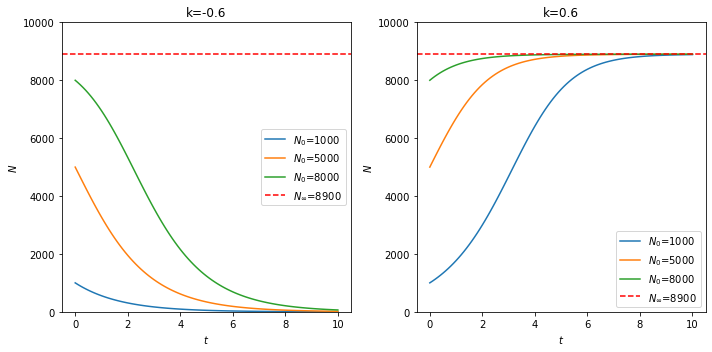

In [172]:
fig, ax = plt.subplots(1, 2, figsize = (5*2, 5), sharex=True, sharey=False)
for i, cur_k in enumerate([-0.6, 0.6]):
    rhs = get_f(cur_k, alpha)
    N_0 = np.array([1000, 5000, 8000])

    for _n in N_0:
        sol = odeint(rhs, [_n], t_eval)
        ax[i].plot(t_eval, sol, label='$N_0$={:.0f}'.format(_n))
    ax[i].axhline(y = N_inf, color = 'r', linestyle = '--', label = '$N_\infty$={:.0f}'.format(N_inf))
    ax[i].set_xlabel('$t$')
    ax[i].set_ylabel('$N$')
    ax[i].set_ylim([0, 10000])
    ax[i].set_title(f'k={cur_k}')
    ax[i].xaxis.set_tick_params(labelbottom=True)
    ax[i].yaxis.set_tick_params(labelbottom=True)
    ax[i].legend()
fig.tight_layout()
plt.show()

## Бифуркация

### Построение бифуркационной диаграммы

Text(0.5, 1.0, 'Bifurcation diagram')

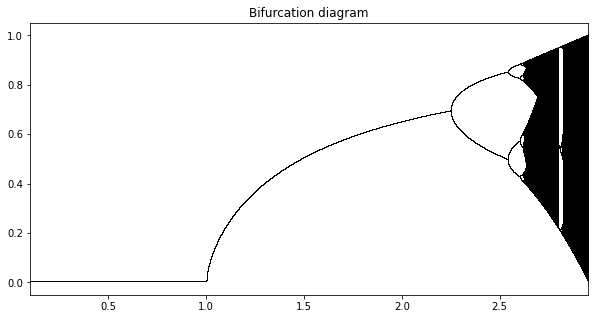

In [173]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1.6

def logistic(r, x):
    y = r * x * (1 - x ** alpha)
    if isinstance(y, np.ndarray):
        y[y < 0] = 0.
    else:
        y = max(y, 0.)
    return y

r_lim = ((alpha + 1) ** (1./alpha + 1))/alpha
n = 100000
r = np.linspace(0.1, r_lim, n)
iterations = 5000
last = 200 # рисуем по последним точкам (их количество равно last)
x = 1e-5 * np.ones(n)
one_step = x

last_x = np.ones((last,n))

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
for i in range(iterations):
    if i == iterations - 1:
        one_step = x
    x = logistic(r, x)

    if i >= (iterations - last):
        last_x[last + i - iterations] = x
        ax1.plot(r, x, ',k', alpha=.25)

ax1.set_xlim(0.1, r_lim)
ax1.set_title("Bifurcation diagram")

### Нахождение точек бифуркации

In [174]:
cycle_len = 1
cycle_arr = np.ones(n)
last_i = n-1
bif_idx = [] # индексы точек бифуркаций в массиве значений параметра
bif_dots = [] # значения точек бифуркаций
r_cnt = 0
for i in range(n):
    _x = last_x[:,i]
    _x_shift = _x[cycle_len:]
    _x_shift_2 = _x[cycle_len*2:]
    if (not (np.abs(_x[:-cycle_len] - _x_shift) < 1e-6).all()) and (np.abs(_x[:-cycle_len*2] - _x_shift_2) < 1e-6).all():
        cycle_len *= 2
        bif_idx.append(i)
        bif_dots.append(r[i])
        r_cnt += 1
        print(f'r_{r_cnt} = {r[i]}')
    cycle_arr[i] = cycle_len
    if r_cnt == 6:
        break
    # if cycle_len*2 > last:
    #     last_i = i
    #     break

print(len(bif_dots))

r_1 = 2.2486931782447335
r_2 = 2.540065581029998
r_3 = 2.6033664780126204
r_4 = 2.6170878531584703
r_5 = 2.6200261102063345
r_6 = 2.620710752625254
6


In [175]:
for i in range(len(bif_dots) - 2):
    print(f'sigma_{i} =', (bif_dots[i+1] - bif_dots[i]) / (bif_dots[i+2] - bif_dots[i+1]))

sigma_0 = 4.602974312753478
sigma_1 = 4.613305613305704
sigma_2 = 4.669902912620846
sigma_3 = 4.291666666668505


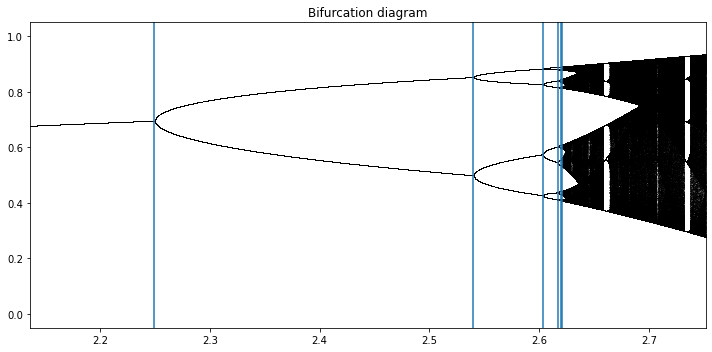

In [176]:
plt.figure(figsize=(10,5))

for i in range(0, last):
    plt.plot(r, last_x[i], ',k', alpha=.25)

for r_val in bif_dots:
    plt.axvline(x=r_val)

plt.xlim(bif_dots[0]*0.95, bif_dots[-1]*1.05)
plt.title("Bifurcation diagram")

plt.tight_layout()
plt.show()

### Поиск тройного цикла

In [177]:
n = 10000
r_tr = np.linspace(2.7, 2.9, n)
iterations = 1000
last = 100
x_tr = 1e-5 * np.ones(n)
one_step_tr = x_tr

last_x_tr = np.ones((last,n))

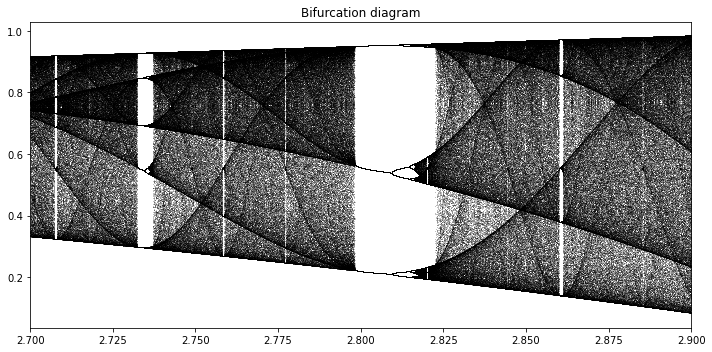

In [178]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
for i in range(iterations):
    if i == iterations - 1:
        one_step_tr = x_tr
    x_tr = logistic(r_tr, x_tr)
    # if i == 0:
    #     one_step_br = x_br
    if i >= (iterations - last):
        ax1.plot(r_tr, x_tr, ',k', alpha=.25)
        last_x_tr[last + i - iterations] = x_tr
# ax1.set_ylim(0.82, 0.86)
ax1.set_xlim(2.7, 2.9)
ax1.set_title("Bifurcation diagram")

plt.tight_layout()

In [179]:
cycle_arr = np.ones(n)
tri_circ_idx = None
tri_circ = None

for i in range(n):
    # print(r_tr[i])
    _x = last_x_tr[:,i]
    _x_shift_1 = _x[1:]
    _x_shift_3 = _x[3:]
    if (not (np.abs(_x[:-1] - _x_shift_1) < 0.0001).all()) and (np.abs(_x[:-3] - _x_shift_3) < 0.0001).all():
        tri_circ_idx = i
        tri_circ = r_tr[i]
        print(f'tricirc_point = {r_tr[i]}')
        break

tricirc_point = 2.798189818981898


## 2 Задание

### Фазовый портрет

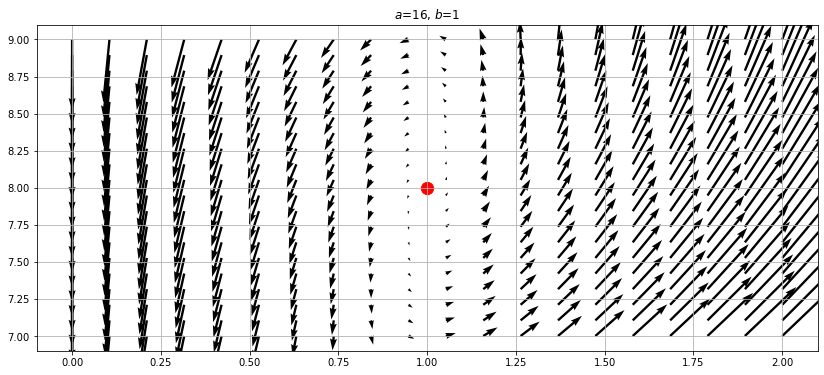

In [180]:
import numpy as np
import matplotlib.pyplot as plt


def create_model(a, b):
    def model(x, t=0):
        V, W = x
        dV = a * V**2 / (b + V) - V * W
        dW = -W + V * W
        return np.array([dV, dW])
    model.a = a
    model.b = b
    return model

def phase_plane_plot(model, range_x=(-1, 1), range_y=None,
                     num_grid_points=50, show=False, points=None):
    '''
    Simple implementation of the phase plane plot in matplotlib.

    Input:
    -----
      *model* : function
        function that takes numpy.array as input with two elements
        representing two state variables
      *range_x* = (-1, 1) : tuple
        range of x axis
      *range_y* = None : tuple
        range of y axis; if None, the same range as *range_x*
      *num_grid_points* = 50 : int
        number of samples on grid
      *show* = False : bool
        if True it shows matplotlib plot
      *points* = None : np.array
        array of points to draw on plot
    '''
    if range_y is None:
        range_y = range_x
    x_ = np.linspace(range_x[0], range_x[1], num_grid_points)
    y_ = np.linspace(range_y[0], range_y[1], num_grid_points)

    x_step = x_[1]-x_[0]
    y_step = y_[1]-y_[0]
    diag_ = np.linalg.norm([x_step, y_step])

    grid = np.meshgrid(x_, y_)

    dfmat = np.zeros((num_grid_points, num_grid_points, 2))
    for nx in range(num_grid_points):
        for ny in range(num_grid_points):
            df = model([grid[0][nx, ny], grid[1][nx, ny]])
            df_len = np.linalg.norm(df)
            # if 0.3*diag_ > df_len or df_len > 5*diag_:
            #     df *= 2*diag_/df_len
            dfmat[nx, ny, 0] = df[0]
            dfmat[nx, ny, 1] = df[1]

    plt.figure(figsize=(14,6))
    plt.grid(True)
    plt.title(f'$a$={model.a}, $b$={model.b}')
    plt.quiver(grid[0], grid[1], dfmat[:, :, 0], dfmat[:, :, 1], scale=100)
    if points is not None:
        plt.scatter(points[:, 0], points[:, 1], color='r', s=[150])
    if show:
        plt.show()


if __name__ == "__main__":
    a = 16
    b = 1

    static_points_1 = [0, 0]
    static_points_2 = [1, a / (b + 1)]

    phase_plane_plot(create_model(a, b),
                     range_x=(0, 2),
                     range_y=(a/(b+1) - 1, a/(b+1) + 1),
                     num_grid_points=20, show=False,
                     points=np.array([static_points_2]))